#  Price Prediction Model for Phones



  ## Registration: 148988
 
 
  ## Name: DENNIS MWENDA
  
  
  ## Client: DR. Lee Bundi
 
 
 
 
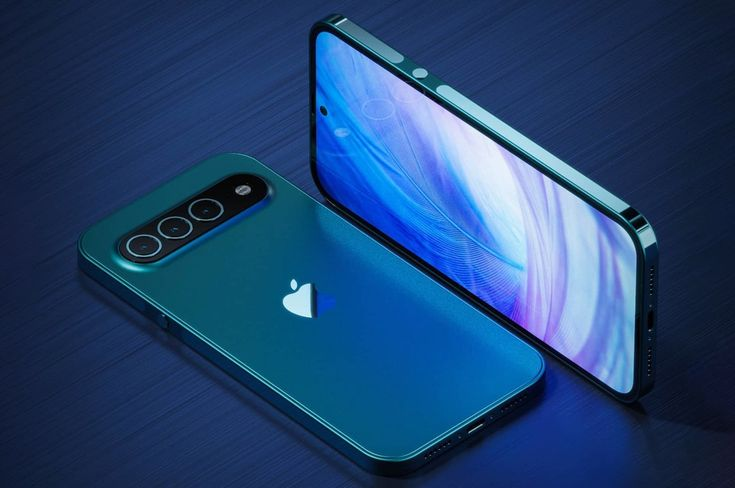

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Problem Statement

Creating a mobile phone price prediction model aims to forecast future prices based on historical data and market variables. 

The objective is to develop an accurate model that assists consumers and retailers in making informed decisions regarding mobile phone purchases and sales. 

Leveraging machine learning techniques, the model seeks to optimize pricing strategies and enhance overall market efficiency.


# 2. Data Collection 




In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/main/phone%20data.csv")
df.head()

,title,brand,rating,availability,ram,internal_storage,battery,main_camera,front_camera,display,processor,connectivity,colors,os_version,price,warranty
0,Itel A49 Play 2GB 32GB 4G,Itel,8.5,NaN,2GB,32GB,"Li-Po 4000mAh, non-removable",5MP,5MP,6.3″ inch,Unisoc SC9832E (28nm),"Wifi, Bluetooth","Black,blue,Purple",NaN,"8,599.00",1-year
1,Infinix Smart 8 4G 3GB 64GB,Infinix,NaN,NaN,3GB,64GB,"Li-Po 5000mAh, non-removable",13MP,8MP,6.6″ inch,Unisoc T606 (12 nm),"Wifi, Bluetooth","Timber Black, Shiny Gold, Crystal Green, Galax...",NaN,"14,999.00",NaN
2,Xiaomi 13 Ultra 5G 16GB 512GB,Xiaomi,NaN,NaN,16GB,512GB,"Li-Po 5000mAh, non-removable",50MP+50MP+50MP+50MP,32MP,6.73″ inch,Qualcomm SM8550-AB Snapdragon 8 Gen 2 (4 nm),"Wifi, Bluetooth","Black, Olive Green, White, Orange, Yellow, Blue",NaN,"132,499.00",NaN
3,Itel 2166 Dual SIM Feature Phone,NaN,8.5,NaN,4 MB,4 MB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,099.00",NaN
4,Tecno Pop 8 3GB 64GB,Tecno,NaN,NaN,3GB,64GB,"Li-Po 5000mAh, non-removable",13MP,8MP,6.6″ inch,Unisoc T606 (12 nm),"Wifi, Bluetooth, 4G","Mystery White, Alpenglow Gold, Magic Skin, Gra...",NaN,"14,299.00",NaN


# 3. Data Pre-processing

- Handling Missing Values

- Checking on outliers

- 

In [9]:


columns_mode = ['brand', 'availability', 'rating', 'ram', 'internal_storage', 'battery', 'main_camera',
                                'front_camera', 'display', 'processor', 'connectivity', 'colors',
                                'os_version', 'price', 'warranty']
# replacing these columns with mode


for column in columns_mode:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

df['rating'] = pd.to_numeric(df['rating'].str.extract(r'(\d+(\.\d+)?)')[0], errors='coerce') # numeric conversion of rating


columns_to_remove_n = ['main_camera', 'front_camera', 'colors', 'processor']
for column in columns_to_remove_n:
    df[column] = df[column].str.replace('\n', mode_value) 
    
    #removing /n 


df['os_version'] = df['os_version'].str.replace(':', '') # apostrophe removal

# Display the updated DataFrame
print(df.head())

                              title    brand  rating  availability   ram  \
0         Itel A49 Play 2GB 32GB 4G     Itel     8.5  Out of stock   2GB   
1       Infinix Smart 8 4G 3GB 64GB  Infinix     5.0  Out of stock   3GB   
2     Xiaomi 13 Ultra 5G 16GB 512GB   Xiaomi     5.0  Out of stock  16GB   
3  Itel 2166 Dual SIM Feature Phone   Xiaomi     8.5  Out of stock  4 MB   
4              Tecno Pop 8 3GB 64GB    Tecno     5.0  Out of stock   3GB   

  internal_storage                        battery          main_camera  \
0             32GB   Li-Po 4000mAh, non-removable                  5MP   
1             64GB   Li-Po 5000mAh, non-removable                 13MP   
2            512GB   Li-Po 5000mAh, non-removable  50MP+50MP+50MP+50MP   
3             4 MB  Li-Po 5000 mAh, non-removable      1-year warranty   
4             64GB   Li-Po 5000mAh, non-removable                 13MP   

  front_camera     display                                     processor  \
0          5MP   6.3″ 

# 4. Data Pre-Processing

## EDA 

###     a) Univariate Visualization - Histogram of phone ratings:

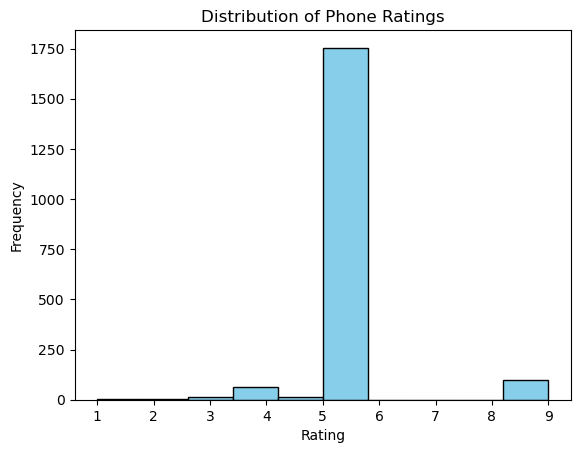

In [10]:
# Histogram of phone ratings
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Phone Ratings')
plt.show()


/Users/la/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/la/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


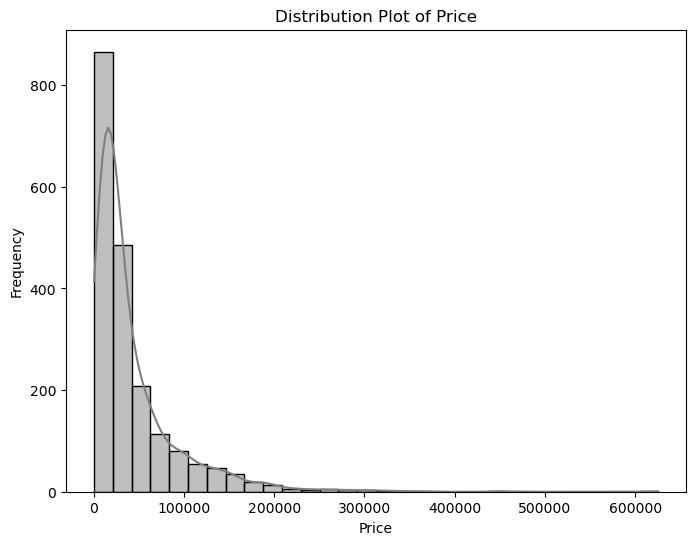

In [21]:
# Plot distribution of price
plt.figure(figsize=(8, 6))
sns.histplot(data=y, kde=True, color='gray', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Price')
plt.show()

#     Feature Engineering 

In [14]:

categorical_features = ['title', 'brand', 'availability', 'ram', 'internal_storage', 'battery',
                        'main_camera', 'front_camera', 'display', 'processor',
                        'connectivity', 'colors', 'os_version', 'warranty']
numerical_features = ['rating']  # Including 'price' as a numerical feature

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Algorithm selection

In [15]:

# Define the model 
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])


# Splitting 

In [16]:
from sklearn.model_selection import train_test_split
#  Convert 'price' column to numerical format
df['price'] = df['price'].str.replace(',', '').astype(float)

# Define features 
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training 

In [17]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title', 'brand',
                                                   'availability', 'ram',
                                                   'internal_storage',
                                                   'battery', 'main_camera',
                                                   'front_camera', 'display',
                                                   'processor', 'connectivity',
                                                   'colors', 'os_version',
                                                   'warranty'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Evaluation

In [18]:


# Make predictions 
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 1182651040.7288759
Mean Absolute Error: 14404.343282051283
R-squared: 0.6558653731582614


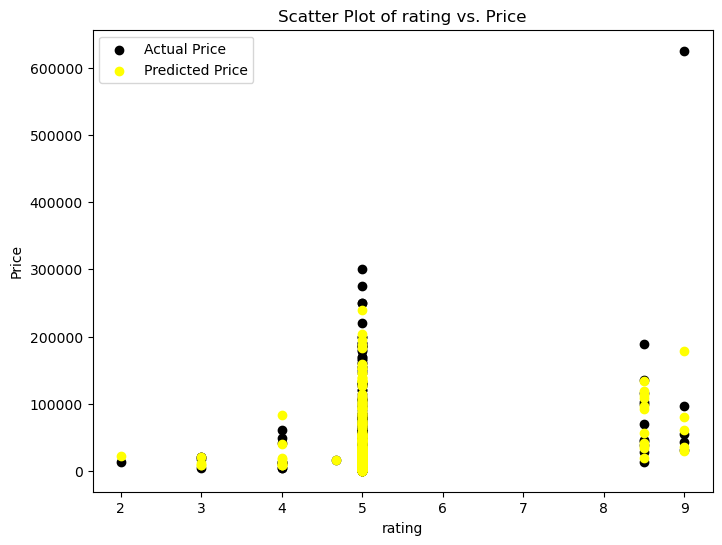

In [19]:

feature_to_visualize = 'rating'
plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature_to_visualize], y_test, color='black', label='Actual Price')
plt.scatter(X_test[feature_to_visualize], y_pred, color='yellow', label='Predicted Price')
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title('Scatter Plot of {} vs. Price'.format(feature_to_visualize))
plt.legend()
plt.show()

# Residual plot for model performance

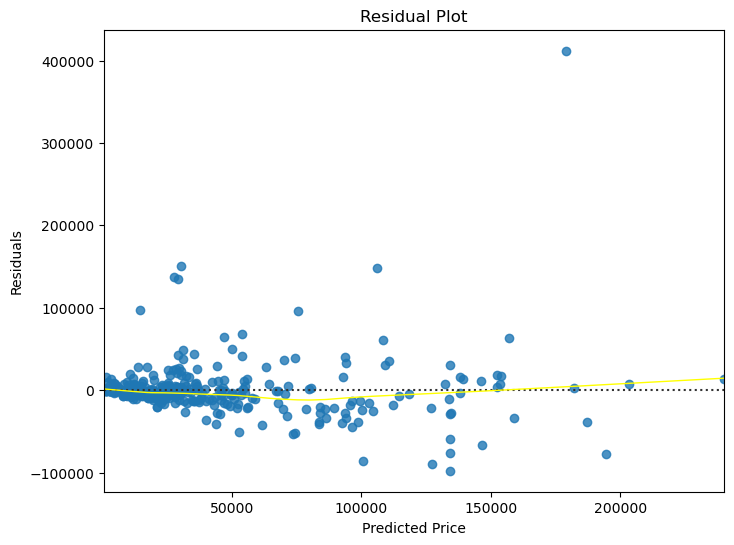

In [20]:

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred.flatten(), y=residuals, lowess=True, line_kws={'color': 'yellow', 'lw': 1})
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
